In [ ]:
C:\Users\User\Documents\Uni Berlin\Module, Vorlesungen, Seminare - Texte, Folien etc\2. Sommersemester 2020\_Collab_statistical_learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv(r"C:\\Users\User\Documents\Uni Berlin\Module, Vorlesungen, Seminare - Texte, Folien etc\2. Sommersemester 2020\_Collab_statistical_learning\train.csv", index_col="PassengerId")

In [106]:
data_copy=pd.read_csv(r"C:\\Users\User\Documents\Uni Berlin\Module, Vorlesungen, Seminare - Texte, Folien etc\2. Sommersemester 2020\_Collab_statistical_learning\train.csv", index_col="PassengerId")

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
datanp = np.array(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CE841A1C0>,
      dtype=object)

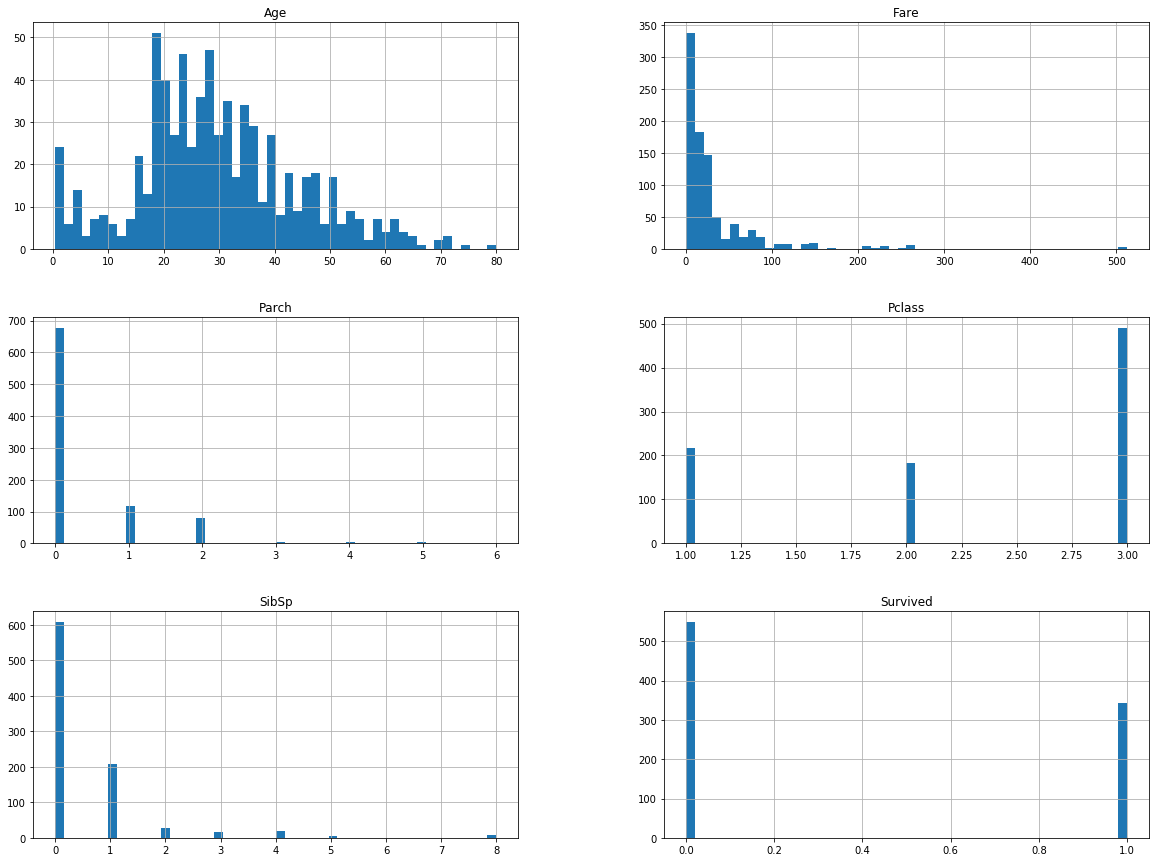

In [9]:
data.hist(bins=50, figsize=(20,15))

In [14]:
data_s data
corr_matrix1 = data.corr()
corr_matrix1

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [15]:
corr_matrix1["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

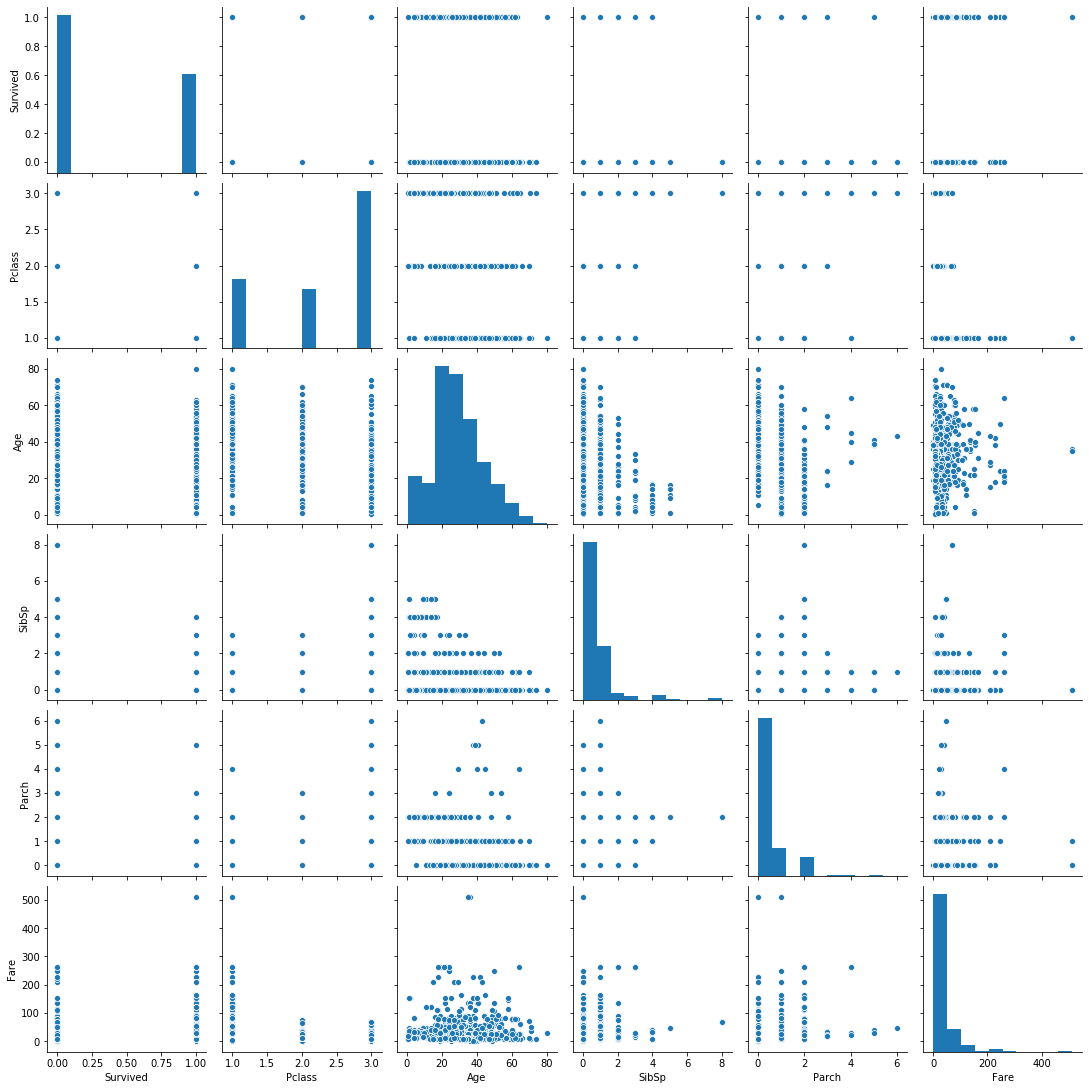

In [16]:
sns.pairplot(data)

In [17]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

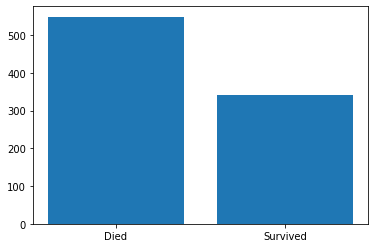

In [18]:
plt.bar(['Died','Survived'],data.Survived.value_counts())

In [20]:
#loc -> specify columns with strings
#iloc -> specify columns with numbers

men_survived = (data.loc[:,'Sex'] == 'male') & (data.loc[:,'Survived'] == 1)
men_died = (data.loc[:,'Sex'] == 'male') & (data.loc[:,'Survived'] == 0)

<BarContainer object of 2 artists>

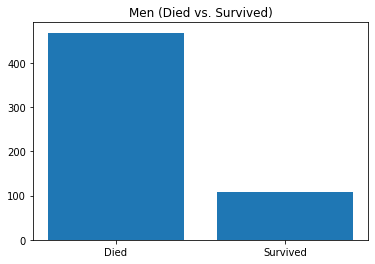

In [22]:

#plt.bar([list of x values], [list of y values]) #Activity: read the documentation and find out how to put a title on the graph
plt.title('Men (Died vs. Survived)')
plt.bar(['Died', 'Survived'],[men_died.sum(), men_survived.sum()])

In [27]:
women_survived = (data.loc[:,'Sex'] == 'female') & (data.loc[:,'Survived'] == 1)
women_died = (data.loc[:,'Sex'] == 'female') & (data.loc[:,'Survived'] == 0)

<BarContainer object of 2 artists>

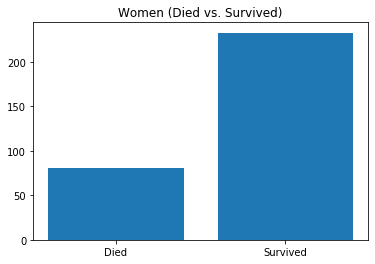

In [28]:
plt.title('Women (Died vs. Survived)')
plt.bar(['Died', 'Survived'],[women_died.sum(), women_survived.sum()])

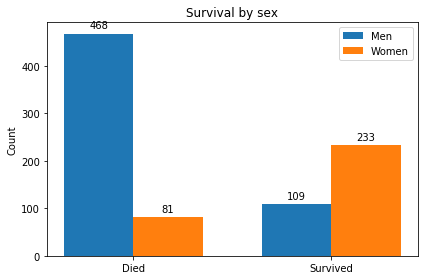

In [25]:
# Totally ripping off example code from the matplotlib documentation.
# That's why some variables won't make sense (like men_means, etc), I didn't bother to change them.
# (obviously it would be good to change them for clarity... but time is scarce.)

labels = ['Died', 'Survived']
men_means = [men_died.sum(), men_survived.sum()]
women_means = [women_died.sum(), women_survived.sum()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Survival by sex')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

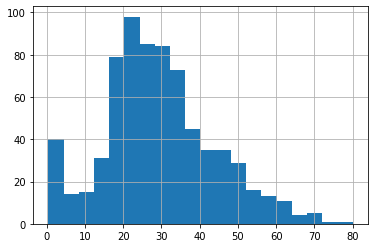

In [33]:
data.Age.hist(bins=20)

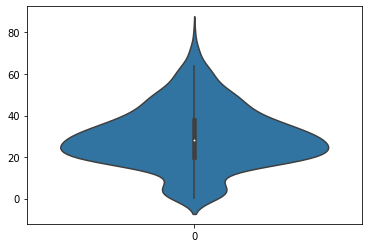

In [32]:
#For some reason the violinplots were having problems with the NaN (Not a Number) values present in the
# Age feature of some rows. I solved this in a hacky way by passing the data as a numpy array.
# There must be a cleaner way for this (like cleaning the data or explicitly ignorning the NaN fields.)

sns.violinplot(data=datanp[:,4]) # what's the function of "[:,4]" here?

In [35]:
pass_survived = (data.loc[:, 'Survived'] == 1)
pass_died = (data.loc[:, 'Survived'] == 0)

np_pass_survived = np.array(data[pass_survived])
np_pass_died = np.array(data[pass_died])

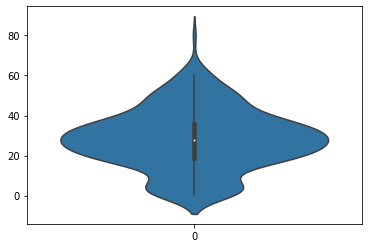

In [36]:
sns.violinplot(data=np_pass_survived[:,4])

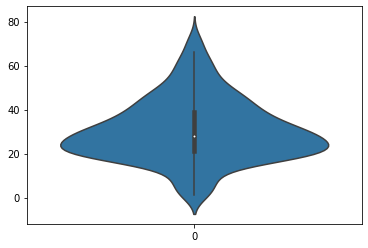

In [37]:
sns.violinplot(data=np_pass_died[:,4])

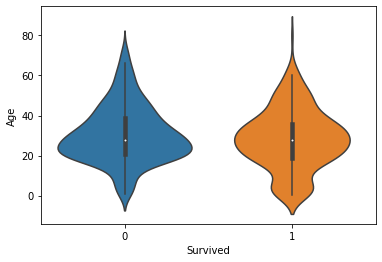

In [86]:
# sns.violinplot(data=[np_pass_died[:,4], np_pass_survived[:,4]])

# somewhat prettier code for the violinplot:
sns.violinplot(x=data['Survived'], y=data['Age'])

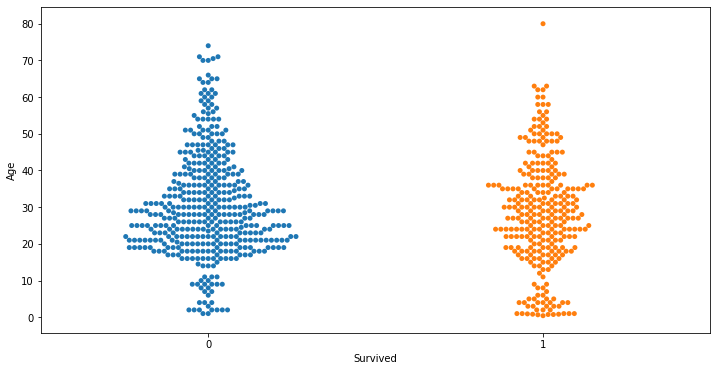

In [47]:
# not quite as pretty but easier alternative:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data['Survived'], y=data['Age'])

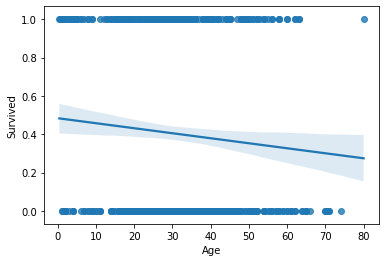

In [39]:
# not so pretty way to see the correlation:

sns.regplot(x=data['Age'], y=data['Survived'])

In [42]:
data[pass_survived].Age.describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [43]:
data[pass_died].Age.describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

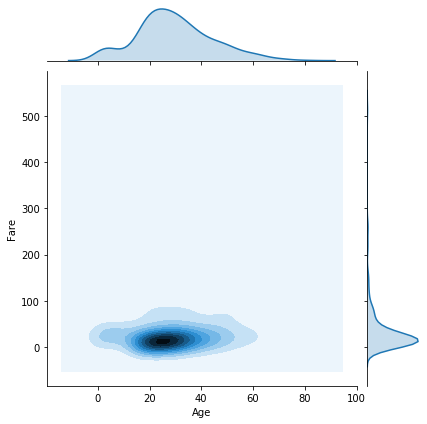

In [49]:
# How do age and fare relate? 
# really pretty to plot two numerical variables
sns.jointplot(x=data['Age'], y=data['Fare'], kind="kde")

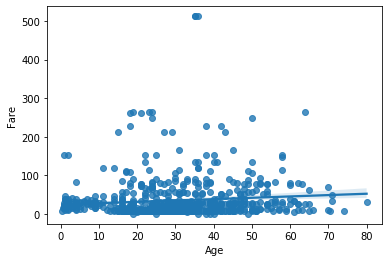

In [51]:
# let's see if there's a corrleation

sns.regplot(x=data['Age'], y=data['Fare'])

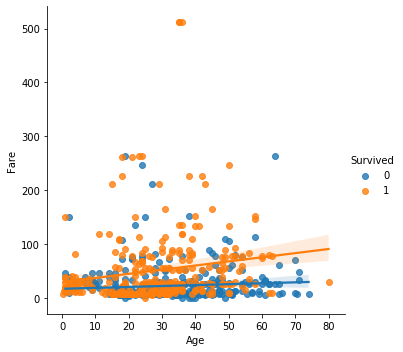

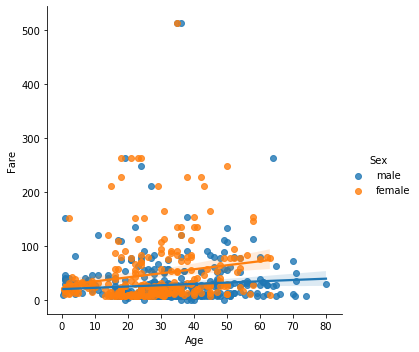

In [54]:
# Correlation is weak, does it also depend on other things?

sns.lmplot(x='Age', y='Fare', hue='Survived', data=data)
sns.lmplot(x='Age', y='Fare', hue='Sex', data=data)

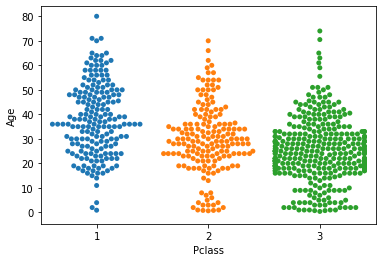

In [57]:
# all not too informative
# get some feeling for the data

sns.swarmplot(x=data['Pclass'], y=data['Age'])

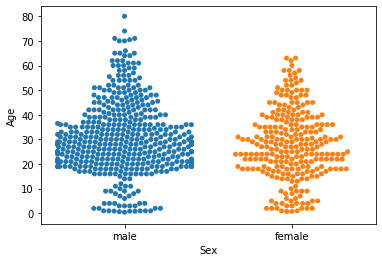

In [58]:
sns.swarmplot(x=data['Sex'], y=data['Age'])

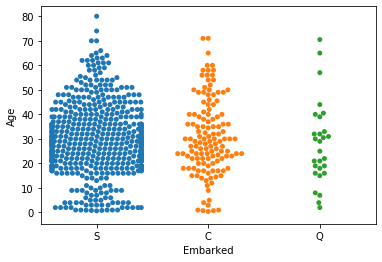

In [59]:
sns.swarmplot(x=data['Embarked'], y=data['Age'])

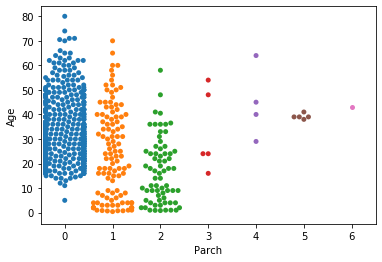

In [60]:
sns.swarmplot(x=data['Parch'], y=data['Age'])

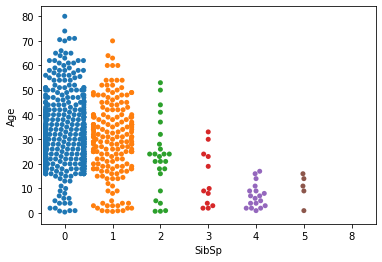

In [61]:
sns.swarmplot(x=data['SibSp'], y=data['Age'])

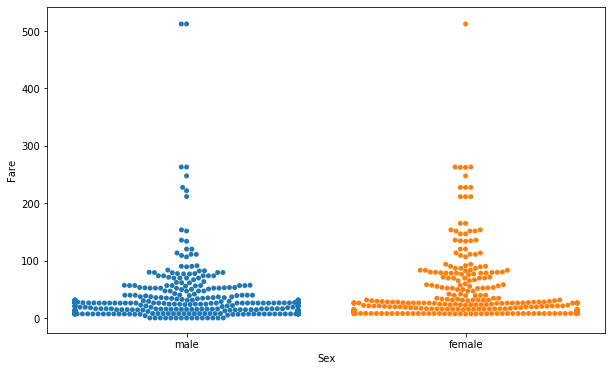

In [69]:
plt.figure(figsize=(10,6))
sns.swarmplot(x=data['Sex'], y=data['Fare'])

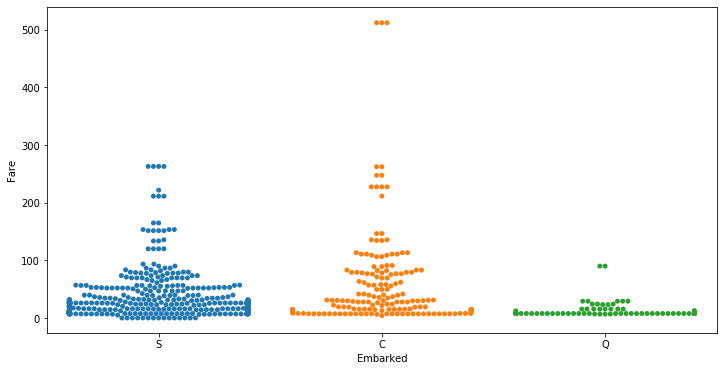

In [66]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data['Embarked'], y=data['Fare'])

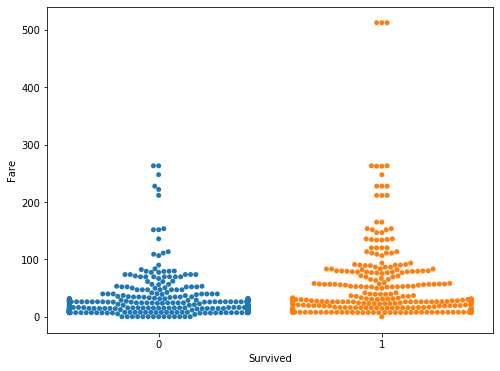

In [70]:
# back to who survived. Did it depend on Fare?

plt.figure(figsize=(8,6))
sns.swarmplot(x=data['Survived'], y=data['Fare'])

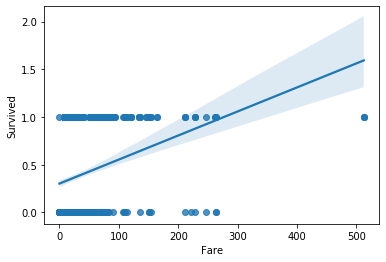

In [71]:
# probably yes, but not too clear
# let's get a quick answer (aparat from the correlation matrix above)

sns.regplot(x=data['Fare'], y=data['Survived'])

In [72]:
# non-graphical answer

data[pass_survived].Fare.describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [73]:
data[pass_died].Fare.describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

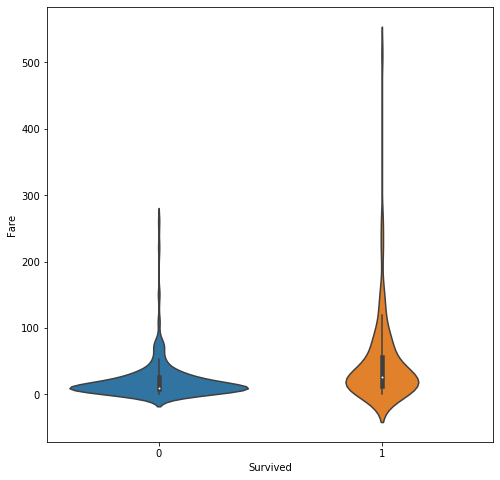

In [81]:
# prettier graphical answer
plt.figure(figsize=(8,8))
sns.violinplot(x=data['Survived'], y=data['Fare'])

In [87]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
y.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [91]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [113]:
# impute mean of Age for missing ages
mean = data['Age'].mean()

X['Age'].fillna(mean, inplace=True)

In [105]:
# sanity check
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [116]:
str_vars = ['Sex', 'Embarked'] 
str_vars = X[str_vars]

str_vars.head()

,Sex,Embarked
PassengerId,,
1,male,S
2,female,C
3,female,S
4,female,S
5,male,S


In [114]:
X = X.dropna(subset=["Embarked"])

X.isnull().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [117]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
str_vars_encoded = ordinal_encoder.fit_transform(str_vars)
str_vars_encoded[:10]

array([[1., 2.],
       [0., 0.],
       [0., 2.],
       [0., 2.],
       [1., 2.],
       [1., 1.],
       [1., 2.],
       [1., 2.],
       [0., 2.],
       [0., 0.]])

In [118]:
# split data into training and validation data, for both features and target

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
dec_t_model = DecisionTreeRegressor()
# Fit model
dec_t_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = dec_t_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

ValueError: Found input variables with inconsistent numbers of samples: [889, 891]